## <center> Hyperparameter Tuning in Desision Tree, Bagging & Random Forest
                                                                                          

### ***What are Hyperparameters?***<br> 
*In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training.*

*Hyperparameters can be classified as model hyperparameters, that cannot be inferred while fitting the machine to the training set because they refer to the model selection task, or algorithm hyperparameters, that in principle have no influence on the performance of the model but affect the speed and quality of the learning process. Different model training algorithms require different hyperparameters.*

*Some of the hyperparameters are:*
1. max_depth
2. n_estimators
3. min_sample_leaf
4. min_sample_split
5. max_samples
6. max_features

***What is Hyperparameter Tuning or Hyperparameter Optimization?***<br>
*Most performance variation can be attributed to just a few hyperparameters. The tunability of an algorithm, hyperparameter, or interacting hyperparameters is a measure of how much performance can be gained by tuning it. Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.*

*Hyperparameters have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.*

### ***Dataset used:***<br>
*This dataset contains 14 attributes. The "target" field refers to the presence of heart disease in the patient.1 represents present of heart disease and 0 represents absence of heart disease.*
*The rest 13 attributes are:*
1. age
2. sex
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
#Reading the file
heart = pd.read_csv('heart.csv')

In [3]:
#Getting shape of the dataframe
heart.shape

(303, 14)

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Checking the count of the classes
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
#Checking if there are any missing values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Separating the independent varaibles
x = heart.drop('target',axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
#Separating the target varaible
y = heart[['target']]
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [10]:
#Separating the dataset into training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 4)

In [11]:
y_train = np.array(y_train['target'])
y_test1 = np.array(y_test['target'])

## A) Decision Tree Classifier

#### 1) Without Hyper parameter Optimization

In [12]:
#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree = tree.predict(x_test)

In [13]:
#Checking different metrics for decision tree model with default hyper parameters
print('Checking different metrics for decision tree model with default hyper parameters:\n')
print("Training accuracy: ",tree.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_tree)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_tree)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_tree)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_tree)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.7032967032967034
Confusion Matrix: 
 [[25 13]
 [14 39]]
ROC AUC score:  0.6968718967229395
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.66      0.65        38
           1       0.75      0.74      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



***Observations & Conclusions:***<br>
*We can see that the **training accuracy** of **Decision Tree** with default hyperparameters is 1 i.e. **100%** accuracy. Whereas when we fit the same model on **testing data**, the accuracy reduces to **69%** approx. Clearly the **model has overfit the training data** and also the **variance is very high** i.e. the model is behaving differently for different samples.*

#### 2) With Hyper parameter Optimization

In [14]:
#Setting values for the parameters
#n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(tree, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [15]:
#Printing the best hyperparameters
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 15}


#### 3) Fitting Descision Tree with best Hyper parameters

In [16]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
tree1 = DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=10, min_samples_leaf=10,min_samples_split=5, max_features=10)
tree1.fit(x_train,y_train)
pred_tree1 = tree1.predict(x_test)

In [17]:
#Checking different metrics for decision tree model after tuning the hyperparameters
print('Checking different metrics for decision tree model after tuning the hyperparameters:\n')
print("Training accuracy: ",tree1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_tree1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_tree1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_tree1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_tree1)
print('Classification Report: \n',class_rep2)

Checking different metrics for decision tree model after tuning the hyperparameters:

Training accuracy:  0.8254716981132075
Testing accuracy:  0.7912087912087912
Confusion Matrix: 
 [[28 10]
 [ 9 44]]
ROC AUC score:  0.7835153922542206
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.81      0.83      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91



***Observations & Conclusions:***<br>
*Now, when we applied the **GridSearchCV** algorithm to our model which is used to select the **best hyperparameters**, we see that the training accuracy is 81.6% aprox and testing accuracy is 73.6%. The **training accuracy** has **reduced** after tuning the hyperparameters but it has also **reduced the overfitting** in Decision Tree.*

ROC AUC curve before and after tuning hyper parameters:



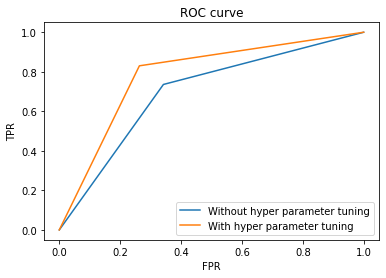

In [18]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_tree,tpr_tree,thre_tree = roc_curve(y_test,pred_tree)
fpr_tree1,tpr_tree1,thre_tree1 = roc_curve(y_test1,pred_tree1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_tree, tpr_tree,label="Without hyper parameter tuning")
ax.plot(fpr_tree1, tpr_tree1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

***Observtaions & Conclusions:***<br>
*From the ROC curve we can see that after hyperparameter tuning the **accuracy** of the model has **increased** to a certain extent against the one when we used default hyperparameters.*

#### 4) Plotting validation curves for each hyper parameter

#### 4)a) Maximum Depth

In [19]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 3)

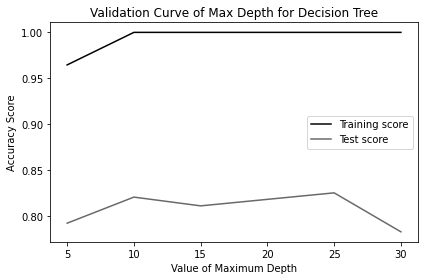

In [20]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Decision Tree")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)b) Minimum Sample Split

In [21]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 3)

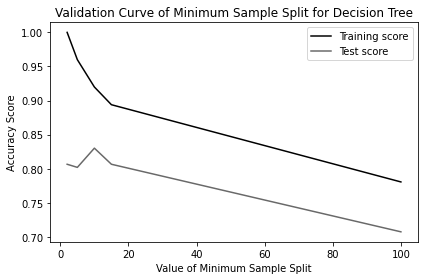

In [22]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Decision Tree")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)c) Minimum Sample Leaf

In [23]:
#Plotting the validation curve of training and testing scores for min_samples_leaf
from sklearn.model_selection import validation_curve
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                DecisionTreeClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range,cv = 3)

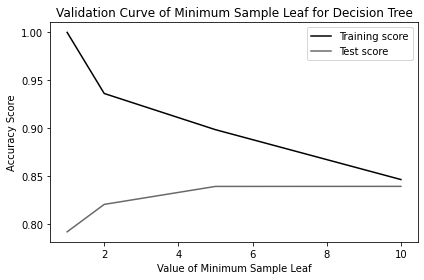

In [24]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Decision Tree")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## B) Bagging Classifier

#### 1) Without Hyper parameter Optimization

In [25]:
#Fitting Bagging Classifier model with default hyper parameters
bagg = BaggingClassifier()
bagg.fit(x_train,y_train)
pred_bagg = bagg.predict(x_test)

In [26]:
#Checking different metrics for bagging model with default hyper parameters
print('Checking different metrics for bagging model with default hyper parameters:\n')
print("Training accuracy: ",bagg.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_bagg)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_bagg)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model with default hyper parameters:

Training accuracy:  0.9905660377358491
Testing accuracy:  0.7802197802197802
Confusion Matrix: 
 [[27 11]
 [ 9 44]]
ROC AUC score:  0.7703574975173784
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.80      0.83      0.81        53

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91



***Observations & Conclusions:***<br>
*We can see that the **training accuracy** of **Bagging Classifier** with default hyperparameters is **99%** accuracy. Whereas when we fit the same model on **testing data**, the accuracy reduces to **73.6%** approx. Clearly the **model has overfit the training data** and also the **variance is very high** i.e. the model is behaving differently for different samples.*

#### 2) With Hyper parameter Optimization

In [27]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(bagg, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


In [28]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 10, 'max_samples': 100, 'n_estimators': 800}


#### 3) Fitting Bagging Classifier with best Hyper parameters

In [29]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=10, max_samples=25,n_estimators= 100)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

In [30]:
#Checking different metrics for bagging model after tuning the hyperparameters
print('Checking different metrics for bagging model after tuning the hyperparameters:\n')
print("Training accuracy: ",bagg1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_bagg1)
print('ROC AUC score: ',roc_auc)
class_rep2 = classification_report(y_test,pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model after tuning the hyperparameters:

Training accuracy:  0.8820754716981132
Testing accuracy:  0.8131868131868132
Confusion Matrix: 
 [[26 12]
 [ 5 48]]
ROC AUC score:  0.79493545183714
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.80      0.91      0.85        53

    accuracy                           0.81        91
   macro avg       0.82      0.79      0.80        91
weighted avg       0.82      0.81      0.81        91



***Obsservations & Conclusions:***<br>
*Now, when we applied the **GridSearchCV** algorithm to our model which is used to select the **best hyperparameters**, we see that the training accuracy has reduced to 88% aprox and testing accuracy has increased to 74% approx. The **training accuracy** has **reduced** after tuning the hyperparameters but it has also **reduced the overfitting** in our model. Although the **difference between training and testing accuracy is still high** which suggests there is a bit of overfitting, but this **may vary for different samples**. But overall, the accuracy has increased and overfitting is decreased.*

ROC AUC curve before and after tuning hyper parameters:



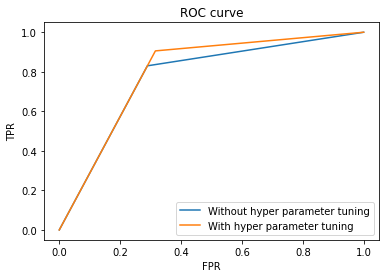

In [31]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_bag,tpr_bag,thre_bag = roc_curve(y_test1,pred_bagg)
fpr_bag1,tpr_bag1,thre_bag1 = roc_curve(y_test1,pred_bagg1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_bag, tpr_bag,label="Without hyper parameter tuning")
ax.plot(fpr_bag1, tpr_bag1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

***Observations & Conclusions:***<br>
*From the ROC curve we can see that after hyperparameter tuning the **accuracy** of the model has **increased** to a certain extent against the one when we used default hyperparameters.*

#### 4) Plotting validation curves for each hyper parameter

#### 4)a) N Estimators

In [32]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 3)

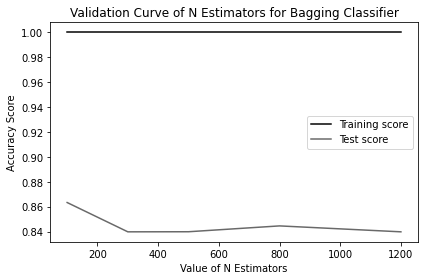

In [33]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Bagging Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)b) Maximum Features

In [34]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= max_features
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = param_range,cv = 3)

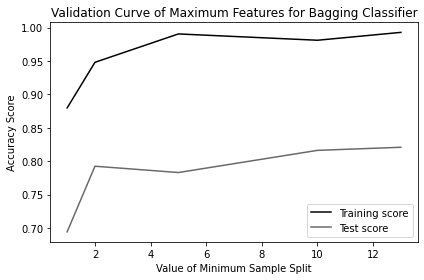

In [35]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Maximum Features for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)c) Maximum Samples

In [36]:
from sklearn.model_selection import validation_curve
param_range= max_samples
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_samples', 
                                param_range = param_range,cv = 3)

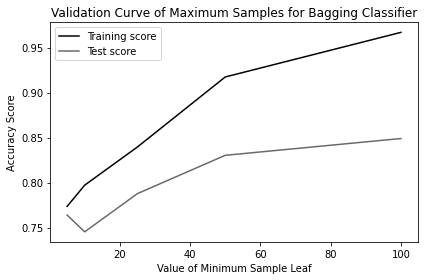

In [37]:
# Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


# Create plot
plt.title("Validation Curve of Maximum Samples for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## C) Random Forest Classifier

#### 1) Without Hyper parameter Optimization

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [39]:
#Checking different metrics for random forest model with default hyper parameters
print('Checking different metrics for random forest model with default hyper parameters:\n')
print("Training accuracy: ",rf.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_rf)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_rf)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_rf)
print('ROC AUC score: ',roc_auc)
class_rep3 = classification_report(y_test,pred_rf)
print('Classification Report: \n',class_rep3)

Checking different metrics for random forest model with default hyper parameters:

Training accuracy:  1.0
Testing accuracy:  0.7912087912087912
Confusion Matrix: 
 [[28 10]
 [ 9 44]]
ROC AUC score:  0.7835153922542206
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.81      0.83      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91



***Observations & Conclusions:***<br>
*We can see that the **training accuracy** of **Random Forest Classifier** with default hyperparameters is **99%** accuracy. Whereas when we fit the same model on **testing data**, the accuracy reduces to **79%** approx. Clearly the **model has overfit the training data** and also the **variance is very high** i.e. the model is behaving differently for different samples.*

#### 2) With Hyper parameter Optimization

In [40]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(rf, hyper_rf, cv = 3, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [41]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [42]:
#Fitting the random forest model with the best hyper parameters obtained through GridSearchCV
rf1 = RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100)
rf1.fit(x_train,y_train)
pred_rf1 = rf1.predict(x_test)

In [43]:
#Checking different metrics for random forest model after tuning the hyperparameters
print('Checking different metrics for random forest model after tuning the hyperparameters:\n')
print("Training accuracy: ",rf1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_rf1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_rf1)
print('Confusion Matrix: \n',conf_mat)
roc_auc = roc_auc_score(y_test1,pred_rf1)
print('ROC AUC score: ',roc_auc)
class_rep3 = classification_report(y_test,pred_rf1)
print('Classification Report: \n',class_rep3)

Checking different metrics for random forest model after tuning the hyperparameters:

Training accuracy:  0.9056603773584906
Testing accuracy:  0.8461538461538461
Confusion Matrix: 
 [[28 10]
 [ 4 49]]
ROC AUC score:  0.8306852035749752
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        38
           1       0.83      0.92      0.88        53

    accuracy                           0.85        91
   macro avg       0.85      0.83      0.84        91
weighted avg       0.85      0.85      0.84        91



***Obsservations & Conclusions:***<br>
*Now, when we applied the **GridSearchCV** algorithm to our model which is used to select the **best hyperparameters**, we see that the training accuracy has reduced to 88% aprox and testing accuracy has increased to 84.6%. The **training accuracy** has **reduced** after tuning the hyperparameters but it has also **reduced the overfitting** in our model.*

ROC AUC curve before and after tuning hyper parameters:



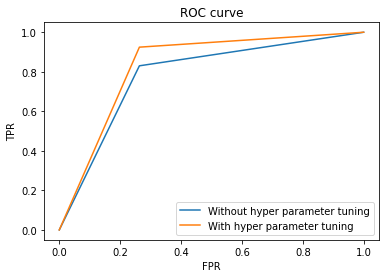

In [44]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_rf,tpr_rf,thre_rf = roc_curve(y_test,pred_rf)
fpr_rf1,tpr_rf1,thre_rf1 = roc_curve(y_test1,pred_rf1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_rf, tpr_rf,label="Without hyper parameter tuning")
ax.plot(fpr_rf1, tpr_rf1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

***Observations & Conclusions:***<br>
*From the ROC curve we can see that after hyperparameter tuning the **accuracy** of the model has **increased** to a certain extent against the one when we used default hyperparameters.*

#### 4) Plotting validation curves for each hyper parameter

#### 4)a) N Estimators

In [45]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 3)

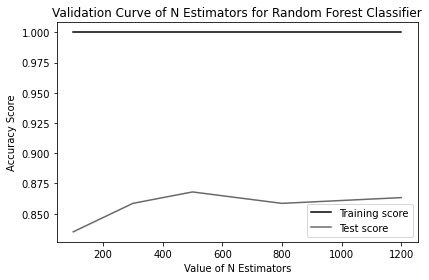

In [46]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Random Forest Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)b) Maximum Depth

In [47]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 3)

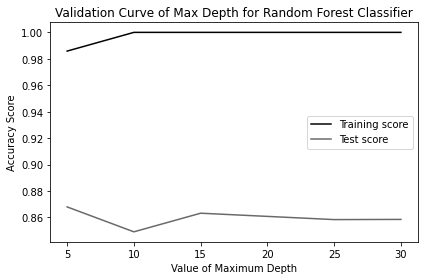

In [48]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Random Forest Classifier")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)c) Minimum Sample Split

In [49]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 3)

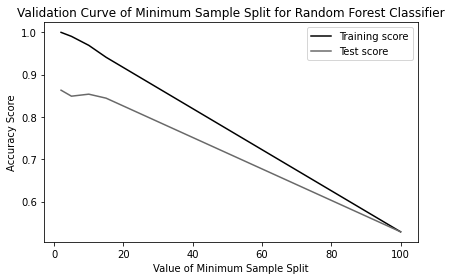

In [50]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### 4)d) Minimum Sample Leaf

In [51]:
#Plotting the validation curve of training and testing scores for min_samples_leaf
from sklearn.model_selection import validation_curve
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range,cv = 3)

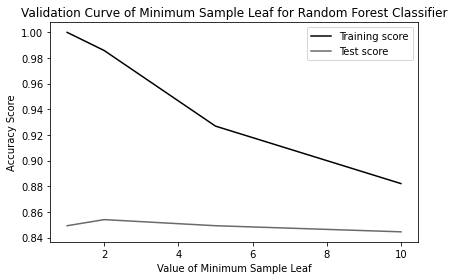

In [52]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()